# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "elwaars"
kaggle_key = "80a962dd254bb8c625eeb6a8cac4b0a3"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [5]:
!kaggle competitions download -c bike-sharing-demand

  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 53.3MB/s]
  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 90.1MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 91.9MB/s]


In [6]:
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [7]:
import os
os.getcwd()

'/content'

In [8]:
os.listdir()

['.config',
 'model_train_score.png',
 'submission_new_hpo.csv',
 'sampleSubmission.csv',
 'AutogluonModels',
 'train.csv',
 '.ipynb_checkpoints',
 'drive',
 'model_test_score.png',
 'test.csv',
 'sample_data']

In [9]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [10]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [11]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
train.datetime= pd.to_datetime(train.datetime)

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [15]:
train.datetime.min()

Timestamp('2011-01-01 00:00:00')

In [16]:
train.datetime.max()

Timestamp('2012-12-19 23:00:00')

In [17]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [18]:
test.datetime= pd.to_datetime(test.datetime)

In [19]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [20]:
predictor = TabularPredictor(label="count").fit(train_data=train[list(test.columns)+['count']],
    time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220121_144140/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220121_144140/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12659.43 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	42.57s	 = Training   runtime
	2.46s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 348.66s of the 548.69s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' arg

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	12.3s	 = Training   runtime
	0.54s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 334.29s of the 534.32s of remaining time.
	-118.4567	 = Validation score   (root_mean_squared_error)
	8.09s	 = Training   runtime


### Review AutoGluon's training run with ranking of models that did the best.

In [21]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.516380       7.714188  534.232589                0.000783           0.370773            3       True         20
1   NeuralNetFastAI_BAG_L2 -115.133198       6.782426  477.449852                0.380228          95.285642            2       True         18
2        LightGBMXT_BAG_L2 -115.893706       6.651610  392.936352                0.249411          10.772142            2       True         13
3          CatBoost_BAG_L2 -116.114837       6.440382  412.062760                0.038183          29.898550            2       True         16
4          LightGBM_BAG_L2 -116.566332       6.498431  390.251783                0.096232           8.087573            2       True         14
5           XGBoost_BAG_L2 -117.300795       6.482674  388.261271         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3 -114.516380  ...       True         20
 1   NeuralNetFastAI_BAG_L2 -115.133198  ...       True         18
 2        LightGBMXT_BAG_L2 -115.893706  ...       True         13
 3          CatBoost_BAG_L2 -116.114837  ...       True         16
 4          LightGBM_BAG_L2 -116.566332  ...       True         14
 5           XGBoost_BAG_L2 -117.300795  ...       True         19
 6     ExtraTreesMSE_BAG_L2 -117.360763  ...       True         17
 7      WeightedEnsemble_L2 -118.432058  ...       True         12
 8   RandomForestMSE_BAG_L1 -118.456660  ...       True          5
 9   RandomForestMSE_BAG_L2 -118.731856  ...       True         15
 10    ExtraTreesMSE_BAG_L1 -128.733445  ...       True          7
 11         LightGBM_BAG_L1 -132.286410  ...       True          4
 12          XGBoost_BAG_L1 -132.308522  ...       True          9
 13         CatBoost_BAG_L1 -132.349692  ...   

### Create predictions from test dataset

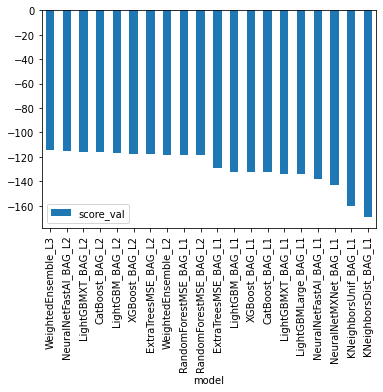

In [22]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [23]:
predictions = predictor.predict(test)
predictions.head()

0     99.404160
1     97.434502
2     97.436783
3    111.368668
4    111.274010
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [24]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      212.253815
std       129.393600
min       -12.358848
25%       107.334900
50%       193.886871
75%       297.398193
max       668.239380
Name: count, dtype: float64

In [25]:
# How many negative values do we have?
predictions[predictions<0].count()

2

In [26]:
predictions[predictions<0]

3393   -12.358848
6024    -5.406065
Name: count, dtype: float32

In [27]:
# Set them to zero
predictions[predictions<0]=0

In [28]:
# Describe the `predictions` series after replacing negative values
predictions.describe()

count    6493.000000
mean      212.256546
std       129.389084
min         0.000000
25%       107.334900
50%       193.886871
75%       297.398193
max       668.239380
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [29]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [30]:
path='/content/drive/MyDrive/Colab Notebooks/Udacity MLE'
path_submission_drive = path+'/'+"bike_sharing_project"+ "/"+"submission.csv"
submission.to_csv(path_submission_drive, index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:02<00:00, 93.2kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [32]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-01-21 14:52:17  first raw submission               complete  1.39806      1.39806       
submission_new_hpo.csv       2022-01-21 14:19:48  new features with hyperparameters  complete  0.53197      0.53197       
submission_new_features.csv  2022-01-20 14:01:56  new features                       complete  0.48164      0.48164       


#### Initial score of `1.39405`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f0d68edd0>,
      dtype=object)

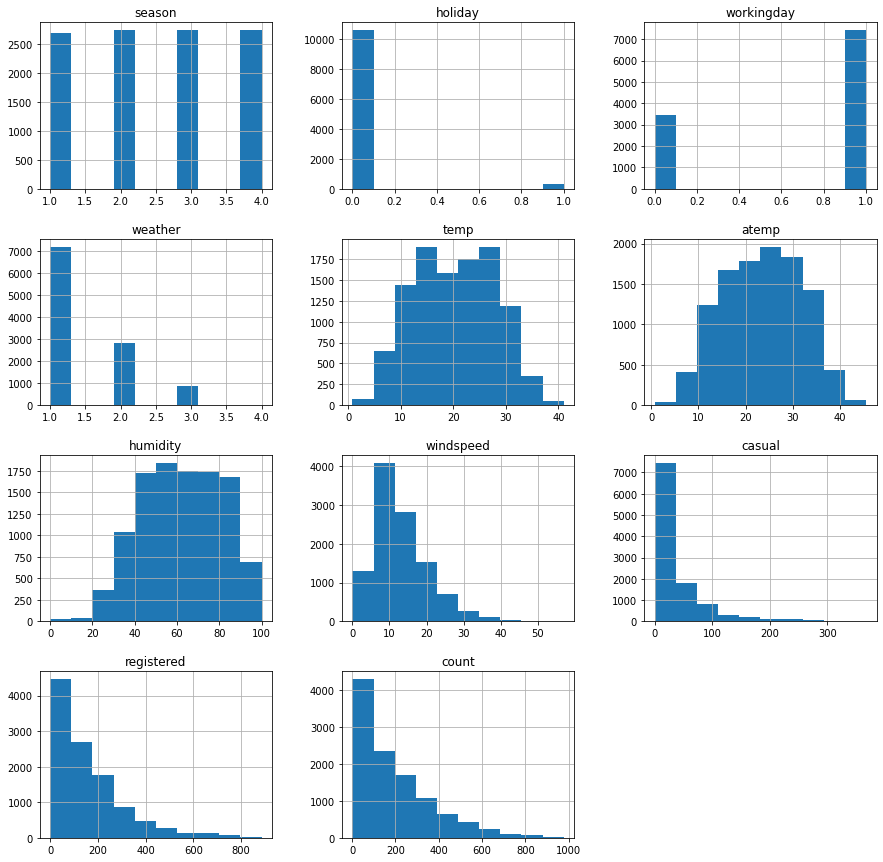

In [33]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,15))

In [34]:
# create a new feature
train["hour"] = train.datetime.dt.hour
test["hour"] = test.datetime.dt.hour
# create a new feature
train["day"] = train.datetime.dt.day
test["day"] = test.datetime.dt.day
# create a new feature
train["month"] = train.datetime.dt.month
test["month"] = test.datetime.dt.month

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8058907850>,
      dtype=object)

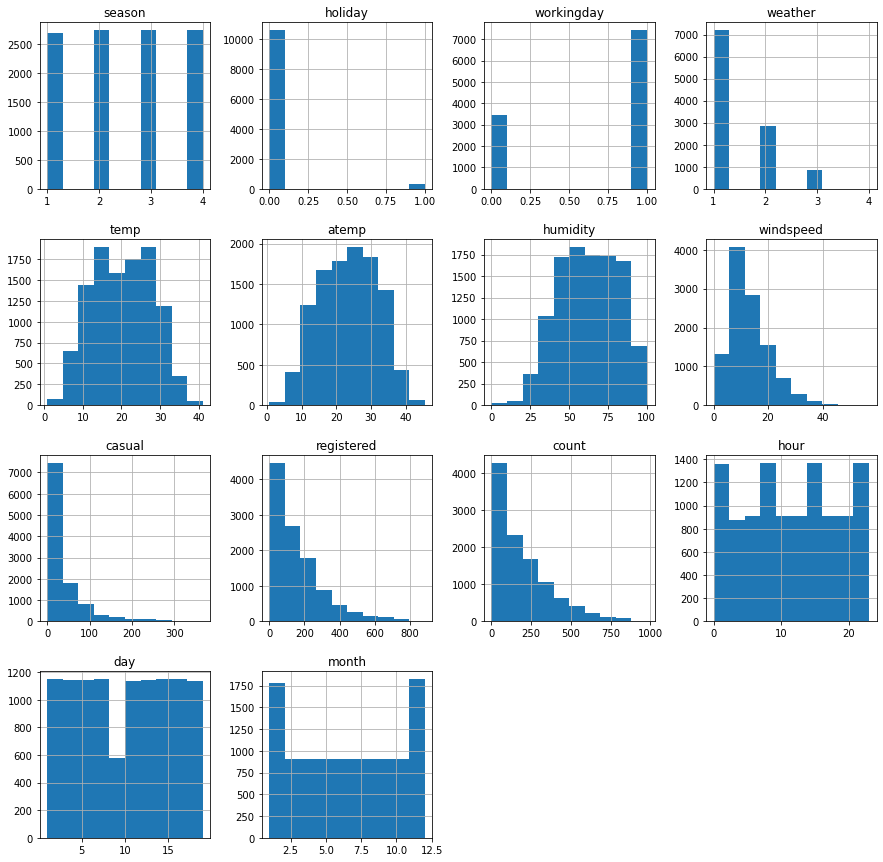

In [35]:
train.hist(figsize=(15,15))

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [36]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [37]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


## Step 5: Rerun the model with the same settings as before, just with more features

In [38]:
predictor_new_features = TabularPredictor(label="count").fit(train_data=train[list(test.columns)+['count']],
    time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220121_145224/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220121_145224/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12187.3 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

[1000]	train_set's rmse: 30.4157	valid_set's rmse: 37.511
[2000]	train_set's rmse: 25.727	valid_set's rmse: 35.8802
[3000]	train_set's rmse: 23.0403	valid_set's rmse: 35.4125
[4000]	train_set's rmse: 21.1098	valid_set's rmse: 35.3735
[5000]	train_set's rmse: 19.6113	valid_set's rmse: 35.357


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.5133	valid_set's rmse: 41.9233
[2000]	train_set's rmse: 25.8593	valid_set's rmse: 39.6286
[3000]	train_set's rmse: 23.1659	valid_set's rmse: 38.8863
[4000]	train_set's rmse: 21.2723	valid_set's rmse: 38.516
[5000]	train_set's rmse: 19.7688	valid_set's rmse: 38.2756
[6000]	train_set's rmse: 18.5105	valid_set's rmse: 38.1661
[7000]	train_set's rmse: 17.4755	valid_set's rmse: 38.0968
[8000]	train_set's rmse: 16.5498	valid_set's rmse: 38.0203
[9000]	train_set's rmse: 15.7383	valid_set's rmse: 37.9545
[10000]	train_set's rmse: 14.9841	valid_set's rmse: 37.9045


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.906	valid_set's rmse: 35.1033
[2000]	train_set's rmse: 26.1475	valid_set's rmse: 34.1491
[3000]	train_set's rmse: 23.4094	valid_set's rmse: 34.1025


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3445	valid_set's rmse: 40.5408
[2000]	train_set's rmse: 25.639	valid_set's rmse: 39.1298
[3000]	train_set's rmse: 23.0931	valid_set's rmse: 38.7256
[4000]	train_set's rmse: 21.2506	valid_set's rmse: 38.422
[5000]	train_set's rmse: 19.7564	valid_set's rmse: 38.2183
[6000]	train_set's rmse: 18.5126	valid_set's rmse: 38.0486
[7000]	train_set's rmse: 17.4664	valid_set's rmse: 37.9144
[8000]	train_set's rmse: 16.5767	valid_set's rmse: 37.854
[9000]	train_set's rmse: 15.7714	valid_set's rmse: 37.8438
[10000]	train_set's rmse: 15.0355	valid_set's rmse: 37.7983


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.6181	valid_set's rmse: 38.5536
[2000]	train_set's rmse: 25.875	valid_set's rmse: 37.1919
[3000]	train_set's rmse: 23.143	valid_set's rmse: 37.0082


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.5318	valid_set's rmse: 41.2095
[2000]	train_set's rmse: 25.7422	valid_set's rmse: 40.2816
[3000]	train_set's rmse: 23.0411	valid_set's rmse: 40.1033
[4000]	train_set's rmse: 21.1256	valid_set's rmse: 40.0478


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.0195	valid_set's rmse: 38.6581
[2000]	train_set's rmse: 26.2305	valid_set's rmse: 35.729
[3000]	train_set's rmse: 23.5288	valid_set's rmse: 34.8288
[4000]	train_set's rmse: 21.5716	valid_set's rmse: 34.5206
[5000]	train_set's rmse: 19.9611	valid_set's rmse: 34.3336
[6000]	train_set's rmse: 18.6552	valid_set's rmse: 34.2076
[7000]	train_set's rmse: 17.5717	valid_set's rmse: 34.1955
[8000]	train_set's rmse: 16.6293	valid_set's rmse: 34.1921


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.544	valid_set's rmse: 38.5247
[2000]	train_set's rmse: 25.7696	valid_set's rmse: 37.29
[3000]	train_set's rmse: 23.1454	valid_set's rmse: 36.923
[4000]	train_set's rmse: 21.2462	valid_set's rmse: 36.8032
[5000]	train_set's rmse: 19.7749	valid_set's rmse: 36.6545
[6000]	train_set's rmse: 18.5662	valid_set's rmse: 36.6581
[7000]	train_set's rmse: 17.5139	valid_set's rmse: 36.6594
[8000]	train_set's rmse: 16.5797	valid_set's rmse: 36.6603


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3459	valid_set's rmse: 40.4898
[2000]	train_set's rmse: 25.5257	valid_set's rmse: 39.5682
[3000]	train_set's rmse: 22.8797	valid_set's rmse: 39.3154


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.0869	valid_set's rmse: 37.2751
[2000]	train_set's rmse: 26.157	valid_set's rmse: 35.2044
[3000]	train_set's rmse: 23.4751	valid_set's rmse: 34.5605
[4000]	train_set's rmse: 21.5298	valid_set's rmse: 34.347
[5000]	train_set's rmse: 19.9674	valid_set's rmse: 34.153
[6000]	train_set's rmse: 18.7136	valid_set's rmse: 34.1335


	-36.6734	 = Validation score   (root_mean_squared_error)
	82.84s	 = Training   runtime
	5.44s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 299.84s of the 499.86s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.1363	valid_set's rmse: 35.5572
[2000]	train_set's rmse: 15.5114	valid_set's rmse: 35.4473


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0431	valid_set's rmse: 36.9373
[2000]	train_set's rmse: 15.5393	valid_set's rmse: 36.1172
[3000]	train_set's rmse: 12.204	valid_set's rmse: 35.9179
[4000]	train_set's rmse: 9.99922	valid_set's rmse: 35.8485


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4766	valid_set's rmse: 32.789


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4591	valid_set's rmse: 38.1004
[2000]	train_set's rmse: 15.6967	valid_set's rmse: 37.1149
[3000]	train_set's rmse: 12.2044	valid_set's rmse: 36.7233
[4000]	train_set's rmse: 9.95476	valid_set's rmse: 36.6799


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3995	valid_set's rmse: 37.384


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.6619	valid_set's rmse: 35.9544


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 20.9449	valid_set's rmse: 35.7483
[2000]	train_set's rmse: 15.4023	valid_set's rmse: 35.1407


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3287	valid_set's rmse: 36.3231
[2000]	train_set's rmse: 15.6319	valid_set's rmse: 35.6071


	-36.5791	 = Validation score   (root_mean_squared_error)
	29.54s	 = Training   runtime
	1.5s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 265.2s of the 465.21s of remaining time.
	-41.308	 = Validation score   (root_mean_squared_error)
	11.17s	 = Training   runtime
	0.49s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 252.55s of the 452.56s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 222.3s of the 422.31s of remaining time.
	-40.9505	 = Validation score   (root_mean_squared_error)
	4.56s	 = Training   runtime
	0.49s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 216.08s of the 416.09s of remaining time.
	-46.4768	 = Validation score   (root_mean_squared_error)
	146.36s	 = Training   runtime
	0.41s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ... Training model for up to 

In [39]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -35.124465       8.201751  303.548444                0.000702           0.431636            2       True         10
1      WeightedEnsemble_L3  -35.192511      13.357830  520.492066                0.000759           0.345336            3       True         18
2          CatBoost_BAG_L2  -35.561757      11.644957  377.381557                0.068346          40.549302            2       True         14
3     ExtraTreesMSE_BAG_L2  -35.641214      12.137071  344.794819                0.560460           7.962564            2       True         15
4          LightGBM_BAG_L2  -35.745001      11.701348  344.303440                0.124737           7.471185            2       True         12
5   RandomForestMSE_BAG_L2  -35.971082      12.136528  369.040029         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L2  -35.124465  ...       True         10
 1      WeightedEnsemble_L3  -35.192511  ...       True         18
 2          CatBoost_BAG_L2  -35.561757  ...       True         14
 3     ExtraTreesMSE_BAG_L2  -35.641214  ...       True         15
 4          LightGBM_BAG_L2  -35.745001  ...       True         12
 5   RandomForestMSE_BAG_L2  -35.971082  ...       True         13
 6   NeuralNetFastAI_BAG_L2  -35.995026  ...       True         16
 7        LightGBMXT_BAG_L2  -36.117581  ...       True         11
 8          LightGBM_BAG_L1  -36.579146  ...       True          4
 9        LightGBMXT_BAG_L1  -36.673400  ...       True          3
 10          XGBoost_BAG_L1  -37.402962  ...       True          8
 11    ExtraTreesMSE_BAG_L1  -40.950464  ...       True          6
 12  RandomForestMSE_BAG_L1  -41.308030  ...       True          5
 13  NeuralNetFastAI_BAG_L1  -46.476793  ...   

In [40]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features[predictions_new_features<0]=0
predictions_new_features.head()

0    14.163477
1     1.125436
2     0.000000
3     2.078440
4     1.749720
Name: count, dtype: float32

In [41]:
# Same submitting predictions
submission_new_features= submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [42]:
path_submission_drive = path+'/'+"bike_sharing_project"+ "/"+"submission_new_features.csv"
submission_new_features.to_csv(path_submission_drive, index=False)

In [43]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 109kB/s]
Successfully submitted to Bike Sharing Demand

In [44]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-01-21 15:03:15  new features                       pending   None         None          
submission.csv               2022-01-21 14:52:17  first raw submission               complete  1.39806      1.39806       
submission_new_hpo.csv       2022-01-21 14:19:48  new features with hyperparameters  complete  0.53197      0.53197       


#### New Score of `0.48164`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [45]:
## according to the documentatin of AutoGluon: https://auto.gluon.ai/dev/tutorials/tabular_prediction/tabular-indepth.html 
label= "count"
metric= "root_mean_squared_error"


import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}
	

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 600  # train various models for ~2 min
#num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    #'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label=label, eval_metric=metric).fit(
    train[list(test.columns)+['count']], 
    #tuning_data=val_data, 
    time_limit=time_limit,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)	   

No path specified. Models will be saved in: "AutogluonModels/ag-20220121_150317/"
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220121_150317/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12133.22 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to m

In [46]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2  -38.024240       0.220117  11.991725                0.000596           0.364463            2       True        231
1           LightGBM/T53  -38.675651       0.018150   0.406199                0.018150           0.406199            1       True         54
2           LightGBM/T86  -38.718498       0.018885   0.396379                0.018885           0.396379            1       True         87
3          LightGBM/T101  -38.743363       0.018702   0.424016                0.018702           0.424016            1       True        102
4          LightGBM/T117  -38.820522       0.018628   0.418180                0.018628           0.418180            1       True        118
5          LightGBM/T100  -38.832864       0.018520   0.398493                0.018520      

{'leaderboard':                    model   score_val  ...  can_infer  fit_order
 0    WeightedEnsemble_L2  -38.024240  ...       True        231
 1           LightGBM/T53  -38.675651  ...       True         54
 2           LightGBM/T86  -38.718498  ...       True         87
 3          LightGBM/T101  -38.743363  ...       True        102
 4          LightGBM/T117  -38.820522  ...       True        118
 ..                   ...         ...  ...        ...        ...
 226   NeuralNetMXNet/T14 -142.942490  ...       True        222
 227   NeuralNetMXNet/T16 -147.328308  ...       True        224
 228    NeuralNetMXNet/T6 -171.386154  ...       True        214
 229   NeuralNetMXNet/T15 -263.584442  ...       True        223
 230   NeuralNetMXNet/T22 -266.524963  ...       True        230
 
 [231 rows x 9 columns],
 'max_stack_level': 2,
 'model_best': 'WeightedEnsemble_L2',
 'model_fit_times': {'LightGBM/T0': 0.395108699798584,
  'LightGBM/T1': 0.42987537384033203,
  'LightGBM/T10': 0.4098

In [47]:
# Remember to set all negative values to zero
predictions_new_hpo_features = predictor_new_hpo.predict(test)
predictions_new_hpo_features[predictions_new_hpo_features<0]=0
predictions_new_hpo_features.head()

0    12.311594
1     3.281225
2     0.901993
3     3.786105
4     3.816559
Name: count, dtype: float32

In [48]:
# Same submitting predictions
submission_new_hpo= submission.copy()
submission_new_hpo["count"] = predictions_new_hpo_features
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [49]:
path_submission_drive = path+'/'+"bike_sharing_project"+ "/"+"submission_new_hpo.csv"
submission_new_hpo.to_csv(path_submission_drive, index=False)

In [50]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 106kB/s]
Successfully submitted to Bike Sharing Demand

In [51]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-01-21 15:12:35  new features with hyperparameters  complete  0.50664      0.50664       
submission_new_features.csv  2022-01-21 15:03:15  new features                       complete  0.55471      0.55471       
submission.csv               2022-01-21 14:52:17  first raw submission               complete  1.39806      1.39806       


In [52]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [53]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,20,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,20,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,20,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,20,1


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

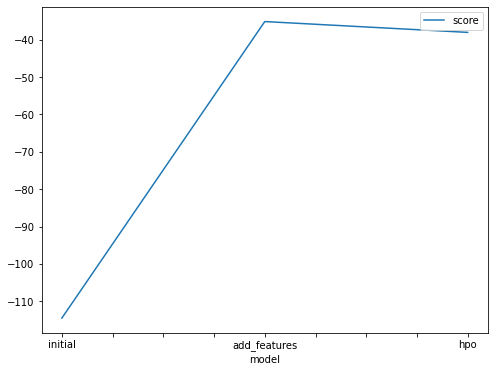

In [57]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-114.516380, -35.124465, -38.024240]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

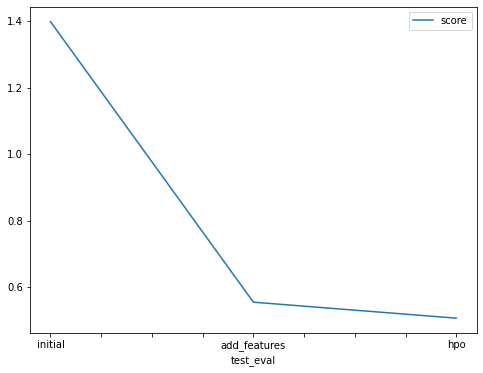

In [58]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39806, 0.55471, 0.50664]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [59]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hp-method": ["none", "none", "tabular-AutoGluon"],
    "presets": ["best_quality","best_quality","best_quality"],
    "timelimit": ["600","600","600"],
    "score": [1.39806, 0.55471, 0.50664]
})

,model,hp-method,presets,timelimit,score
0,initial,none,best_quality,600,1.39806
1,add_features,none,best_quality,600,0.55471
2,hpo,tabular-AutoGluon,best_quality,600,0.50664
